In [10]:
#Setting
import numpy as np
a=1; b=2; x0=2; y0=3; y1=2
tol=1.e-4

def f(x):
   return np.tanh(x)

def df(x):
  return 1-np.tanh(x)**2

In [1]:
#Bisection method
def bisection(xl,xr):
  loop=0
  if(f(xl)*f(xr)>0): print("Error: there might not be a root")
  else :
    while(True):
      loop+=1
      c=(xl+xr)/2.
      if(loop>1000):
        print("Error: Many iterations")
        exit(1)
      if(f(xl)*f(c)>0): xl=c
      if(f(xl)*f(c)<0):
        if(abs(f(c))<tol):break
        else: xr=c
      if(f(xl)*f(c)==0): break
  return loop, c

Strengths: stable

Weakness : slow

In [11]:
#Newton method
def newton(x):
  loop=0
  while(True):
    loop+=1
    if(loop>1000):
        print("Error: Many iterations")
        break
    x=x-f(x)/df(x)
    if(abs(f(x))<tol):
      return loop, x
      break

0.9640275800758169


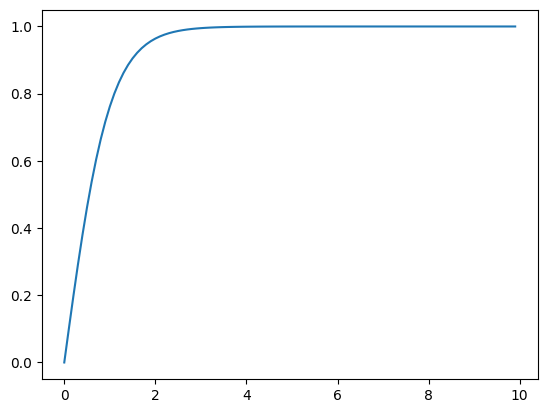

In [13]:
import matplotlib.pyplot as plt
x=np.arange(0,10,0.1)
plt.plot(x,f(x))
print(f(2))

Strengths: Fast

Weakness : Unstable

In [12]:
newton(2)

Error: Many iterations


<ipython-input-11-ab35b481a140>:9: RuntimeWarning: divide by zero encountered in double_scalars
  x=x-f(x)/df(x)
<ipython-input-11-ab35b481a140>:9: RuntimeWarning: invalid value encountered in double_scalars
  x=x-f(x)/df(x)


In [ ]:
#Secant method
def secant(x1,x2):
  loop=0
  delta=x2-x1
  x=x2
  while(True):
    loop+=1
    if(loop>1000):
        print("Error: Many iterations")
        exit(1)
    delta=-f(x)*delta/(f(x)-f(x-delta))
    x=delta+x
    if(abs(f(x))<tol):
      return loop, x
      break

In [ ]:
#Table
import pandas as pd
import numpy as np
table= pd.DataFrame(
    {'Bisection' : [bisection(a,b)[1],bisection(a,b)[0],abs(bisection(a,b)[1]-np.sqrt(3))],
     'Newton'    : [newton(x0)[1],newton(x0)[0], abs(newton(x0)[1]-np.sqrt(3))],
     'Secant'    : [secant(y0,y1)[1],secant(y0,y1)[0],abs(secant(y0,y1)[1]-np.sqrt(3))]},
     index= ['x_n', 'Iteration', 'Gap with sqrt(3)']
)
table=table.T
table['Iteration']=table['Iteration'].astype(int)

In [ ]:
table

,x_n,Iteration,Gap with sqrt(3)
Bisection,1.732051,35,2.474598e-11
Newton,1.732051,4,0.000000e+00
Secant,1.732051,5,3.378187e-12
